In [1]:
from visualizing import draw_graph, draw_overlap, draw_diffs
from simulating import *
import collections

%matplotlib notebook
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [40, 20]
mpl.rcParams['figure.dpi'] = 72

In [2]:
S = simulate_paths(sigma=0.2, M=4, I=100)
print(S[:,:10])

[[100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.        ]
 [105.88372958  99.36935396 107.49443081 117.32796953  98.42106423
   98.42122581 117.98900799 108.78937342  96.1320481  106.37027742]
 [ 92.6014247   95.99337931 104.65482858 109.09787823  97.57548439
  103.25086154 143.55382582 111.5386804   99.38267339 106.37617139]
 [ 96.69708557 102.29468087 117.50403959 122.13483629  85.65771876
   94.71563359 152.27888118 118.30310711 105.42318201 157.55187165]
 [ 89.67425916  97.45001425 127.57469969 130.79911546  86.12236908
   96.554905   174.33523333 112.34706745 112.18982394 155.56061809]]


In [3]:
fs_bins = pivot_bins(binning_S(S=S, method='fixed'))
kmeans_bins = pivot_bins(binning_S(S=S, method='kmeans'))

binning using kmeans:   0%|                                                                      | 0/5 [00:00<?, ?it/s]C:\Users\phili\Documents\University\IFM\binning\simulating.py:34: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0).fit(S_t.reshape(-1,1))
binning using kmeans: 100%|██████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.28it/s]


Die folgendenden Plots zeigen die korrespondierenden bins der beiden genutzten Partitionsalgorithmen, um deren Ähnlichkeit zu untersuchen.

In [4]:
S = simulate_paths(sigma=0.3, M=10, I=1000)

bin_S = binning_S(S=S, method='kmeans', nbins=5)

def create_edgelist(S, bin_S, unique_edges=True):
    res_array = []

    for p in range(len(S[0])):
        res_array.append([])
        for i in range(len(S)):
            cur_t = bin_S[f"t{i}"]
            for b in cur_t.keys():
                if min(cur_t[b]) <= S[i][p] <= max(cur_t[b]):
                    res_array[p].append(np.median(cur_t[b]))
                    break

    res_array = np.array(res_array).T.tolist()
    edgelist = []
    for i in range(len(res_array)):
        try:
            for x, y in zip(res_array[i], res_array[i+1]):
                counter = collections.Counter(zip(res_array[i], res_array[i+1]))
                s=0
                for k in counter.keys():
                    if x==k[0]:
                        s += counter[k]
                weight = counter[(float(x),float(y))]/s
                edgelist.append({"node_s": x, "node_e": y, "weight": weight, "position_s": (i, x), "position_e": (i+1, y)})
        except:
            pass
    if unique_edges:
        a = []
        for item in edgelist:
            if item not in a: a.append(item)
        return(a)
    return(edgelist)

binning using kmeans:   0%|                                                                     | 0/11 [00:00<?, ?it/s]C:\Users\phili\Documents\University\IFM\binning\simulating.py:34: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0).fit(S_t.reshape(-1,1))
binning using kmeans: 100%|████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  8.36it/s]


In [5]:
edgelist=create_edgelist(S, bin_S)



<IPython.core.display.Javascript object>


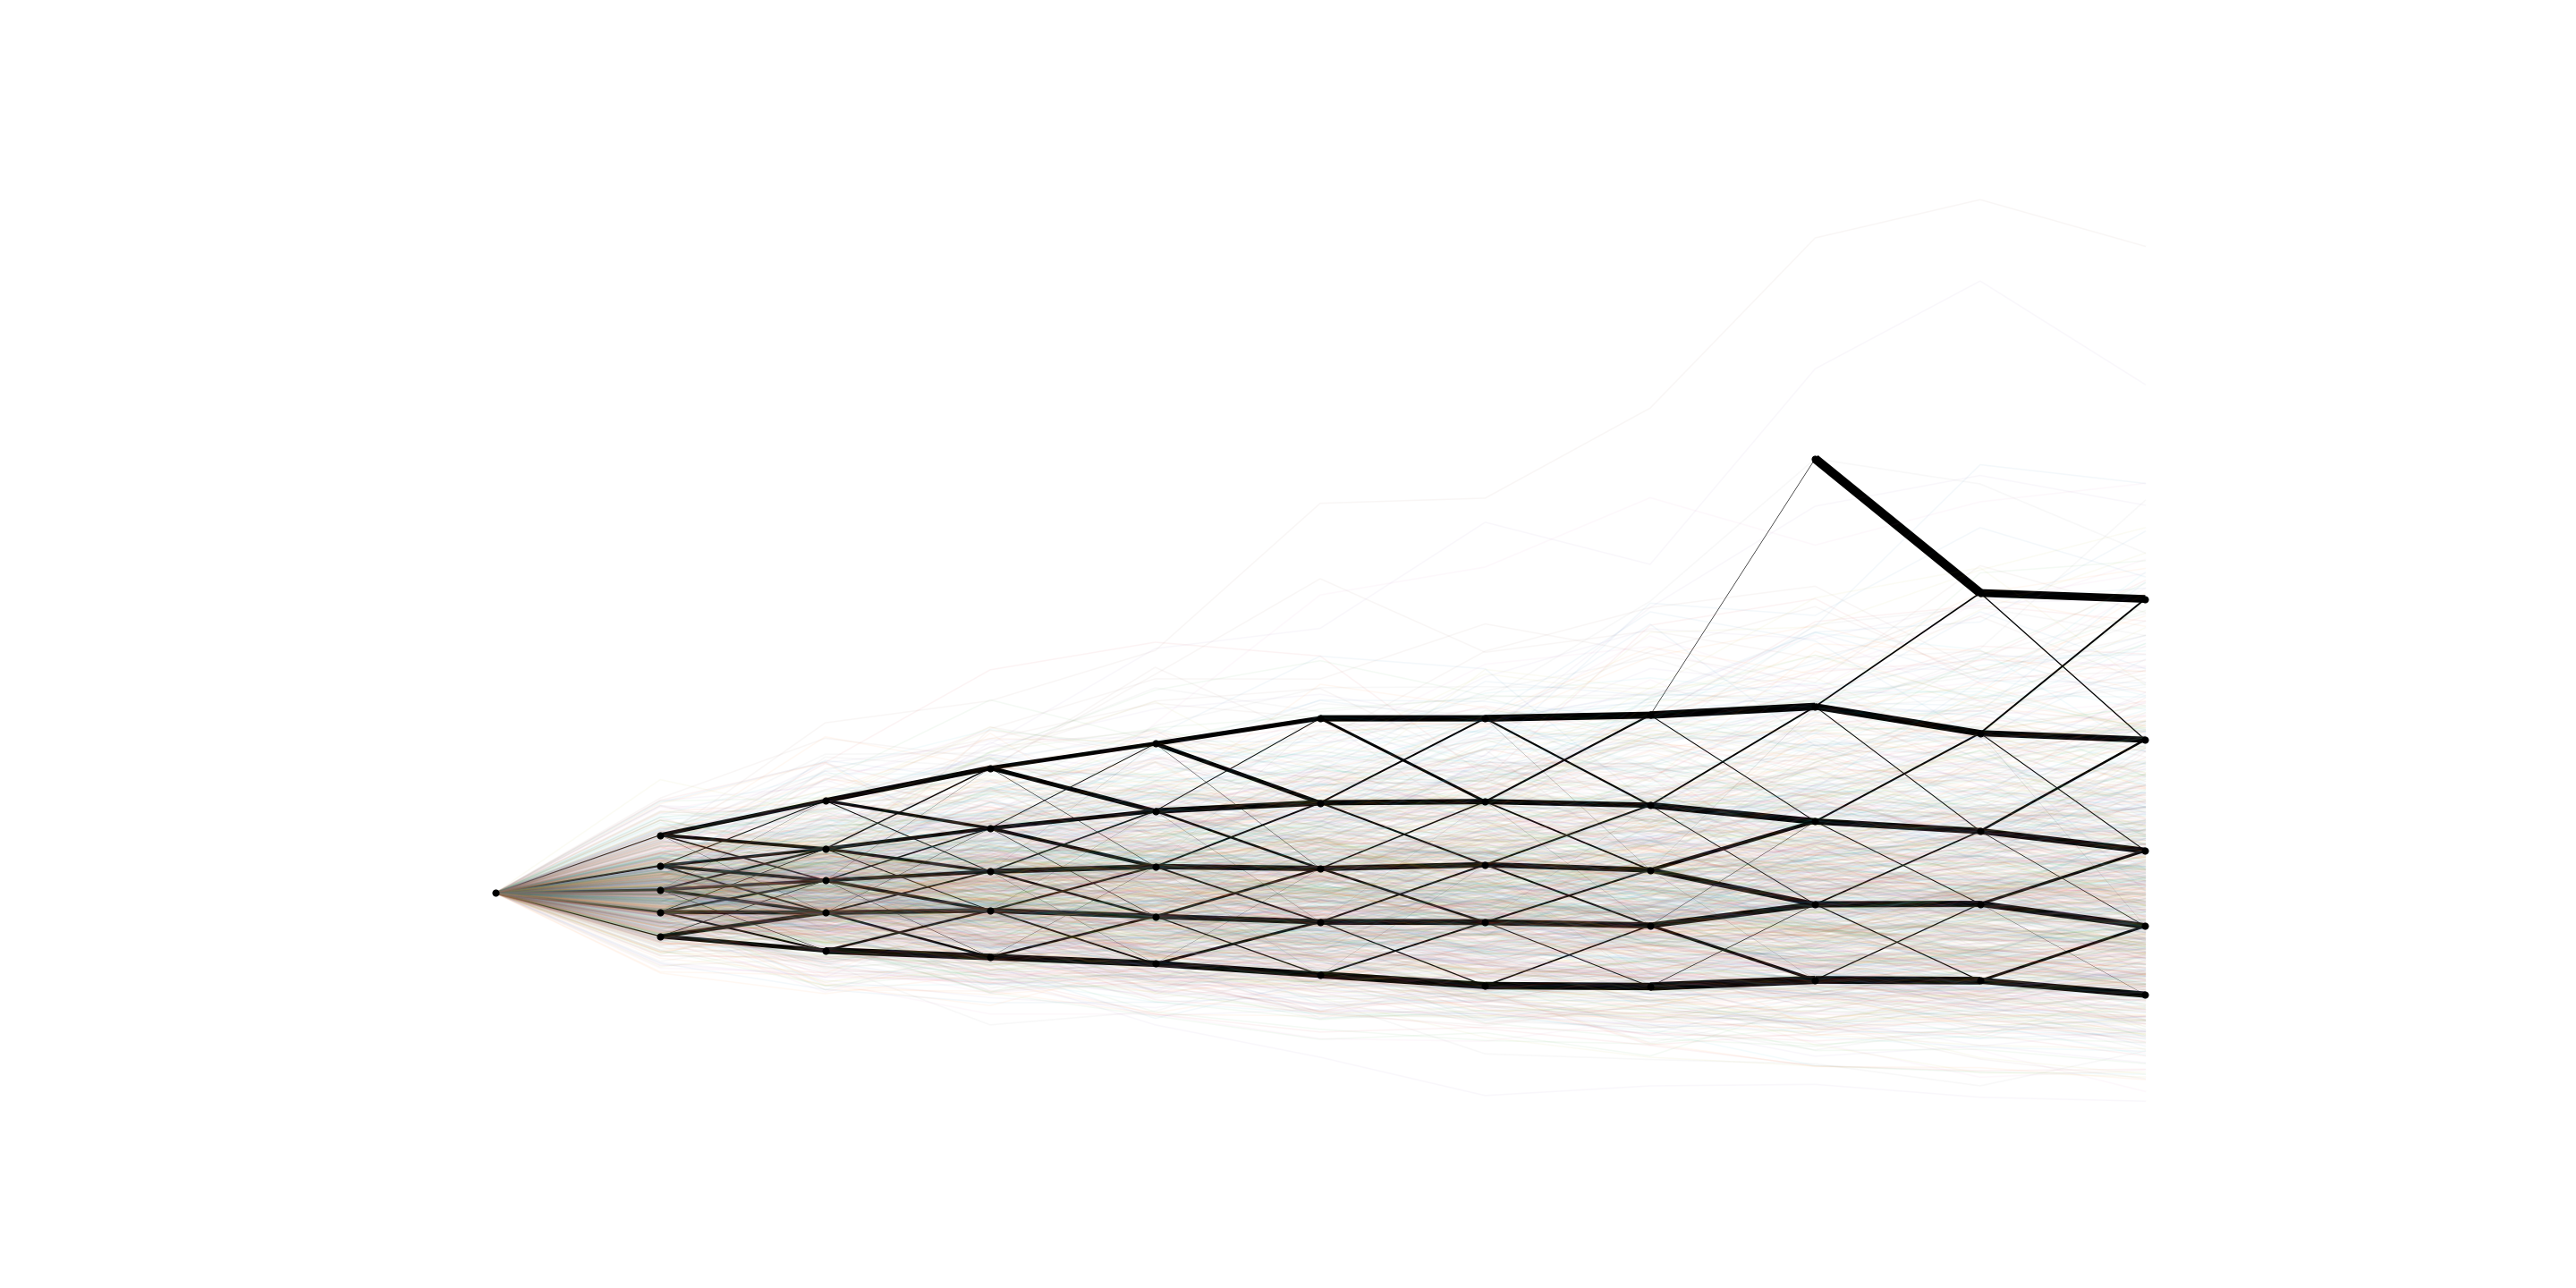

NameError: name 'a' is not defined

In [6]:

import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40, 20))
G = nx.Graph()
for i in edgelist:
    color = (400*i["weight"], 100, 100) if (i["node_s"] >= i["node_e"]) else (300*i["weight"], 100, 100)
    G.add_node(str(i["node_s"]), pos=i["position_s"], label=round(i["weight"], 0))
    G.add_node(str(i["node_e"]), pos=i["position_e"], label=round(i["weight"], 0))
    G.add_edge(str(i["node_s"]), str(i["node_e"]), width=i["weight"], color=color, labels=i["weight"])

ax.plot(S, alpha=.05)    

nx.draw(G,
        with_labels=False,
        node_size=50,
        node_color="black",
        pos=nx.get_node_attributes(G,'pos'),
        width=[G[u][v]['width']*10 for u,v in G.edges()],
        edge_color="black",
        node_shape="o")

nx.draw_networkx_edge_labels(
    G, pos=nx.get_node_attributes(G,'pos'),
    edge_labels= {(str(i["node_s"]), str(i["node_e"])): round(i["weight"], 2) for i in a},
    label_pos=0.2,
    font_color='black',
    font_size=6
)

ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

plt.savefig("nx.svg")

In [ ]:
edge_labels =

In [ ]:
edgelist

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go # Import the graphical object
init_notebook_mode(connected=True)  

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = list(set([i["node_s"] for i in a]))
        ),
        # This part is for the link information
        link = dict(
            source = [str(i["node_s"]) for i in a],
            target = [str(i["node_e"]) for i in a],
            value = [3 for i in a],
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()